In [8]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [10]:

df = pd.read_csv('DATA MHS.csv')
df.head()



NameError: name 'pd' is not defined

In [11]:
df.describe().T

NameError: name 'df' is not defined

In [11]:
corr = df.corr()

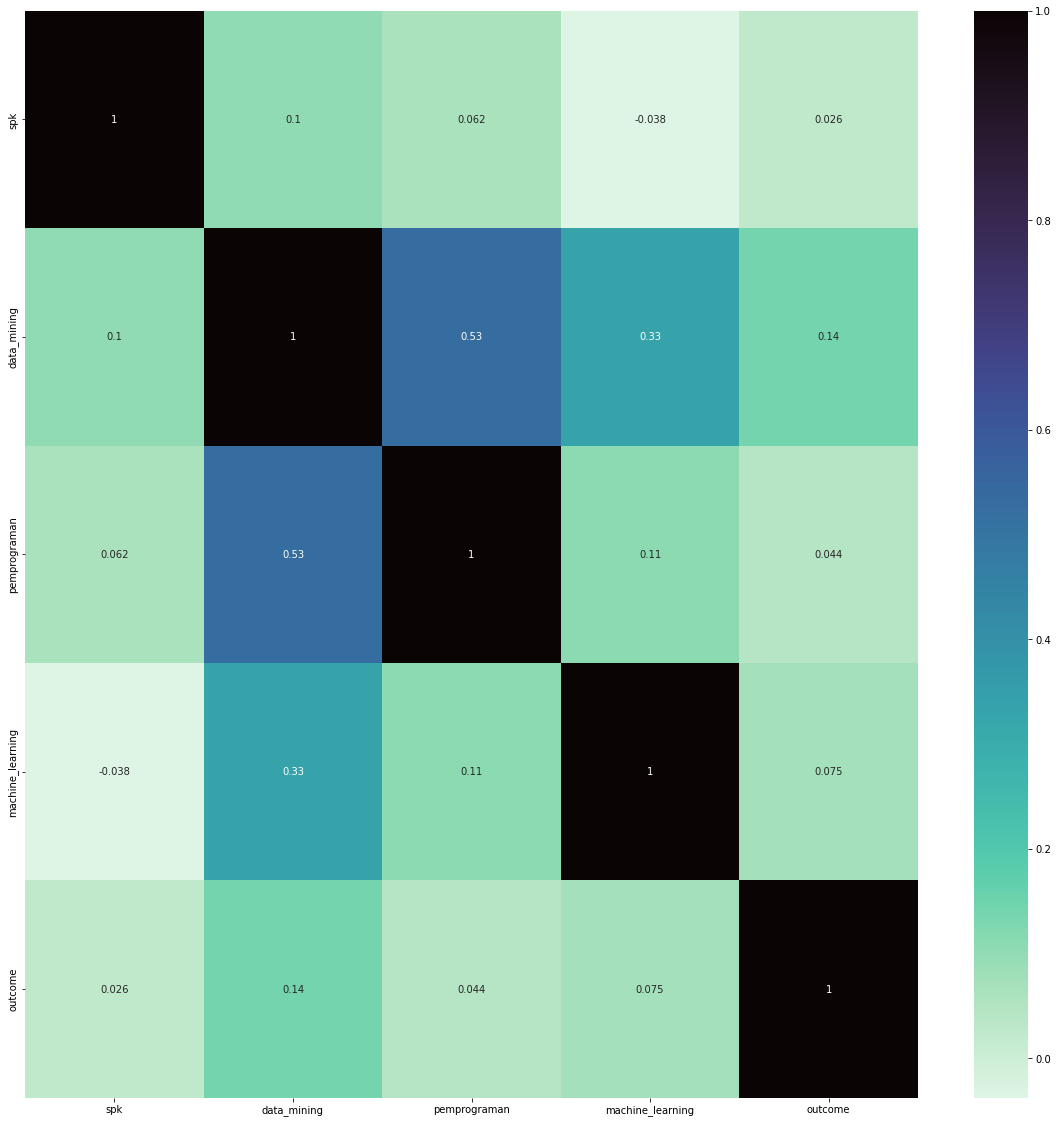

In [12]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap='mako_r',annot=True)
plt.show()

In [3]:
#Get the absolute value of the correlation
cor_target = abs(corr["OUTCOME"])



NameError: name 'corr' is not defined

In [35]:
# Select highly correlated features (thresold = 0.)
relevant_features = cor_target[cor_target>0.01]
print(relevant_features)

spk                 0.025673
data_mining         0.143803
pemprograman        0.044207
machine_learning    0.074648
outcome             1.000000
Name: outcome, dtype: float64


In [57]:
# Collect the names of the features
names = ['spk','data_mining','pemprograman','machine_learning','outcome']

In [58]:
# Drop the target variable from the results
names.remove('outcome')

In [59]:
# Display the results
print(names)

['spk', 'data_mining', 'pemprograman', 'machine_learning']


In [60]:
X = df[names].values
y = df['outcome']

In [61]:
def scale(X):
    """
    Standardizes the data in the array X.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).

    Returns:
        numpy.ndarray: The standardized features array.
    """
    # Calculate the mean and standard deviation of each feature
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    # Standardize the data
    X = (X - mean) / std
    return X

In [62]:
X = scale(X)

In [63]:
def train_test_split(X, y, random_state=41, test_size=0.2):
    """
    Splits the data into training and testing sets.

    Parameters:
        X (numpy.ndarray): Features array of shape (n_samples, n_features).
        y (numpy.ndarray): Target array of shape (n_samples,).
        random_state (int): Seed for the random number generator. Default is 42.
        test_size (float): Proportion of samples to include in the test set. Default is 0.2.

    Returns:
        Tuple[numpy.ndarray]: A tuple containing X_train, X_test, y_train, y_test.
    """
    # Get number of samples
    n_samples = X.shape[0]

    # Set the seed for the random number generator
    np.random.seed(random_state)

    # Shuffle the indices
    shuffled_indices = np.random.permutation(np.arange(n_samples))

    # Determine the size of the test set
    test_size = int(n_samples * test_size)

    # Split the indices into test and train
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]

    # Split the features and target arrays into test and train
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [65]:
class SVM:
    """
    A Support Vector Machine (SVM) implementation using gradient descent.

    Parameters:
    -----------
    iterations : int, default=1000
        The number of iterations for gradient descent.
    lr : float, default=0.01
        The learning rate for gradient descent.
    lambdaa : float, default=0.01
        The regularization parameter.

    Attributes:
    -----------
    lambdaa : float
        The regularization parameter.
    iterations : int
        The number of iterations for gradient descent.
    lr : float
        The learning rate for gradient descent.
    w : numpy array
        The weights.
    b : float
        The bias.

    Methods:
    --------
    initialize_parameters(X)
        Initializes the weights and bias.
    gradient_descent(X, y)
        Updates the weights and bias using gradient descent.
    update_parameters(dw, db)
        Updates the weights and bias.
    fit(X, y)
        Fits the SVM to the data.
    predict(X)
        Predicts the labels for the given data.

    """

    def __init__(self, iterations=1000, lr=0.01, lambdaa=0.01):
        """
        Initializes the SVM model.

        Parameters:
        -----------
        iterations : int, default=1000
            The number of iterations for gradient descent.
        lr : float, default=0.01
            The learning rate for gradient descent.
        lambdaa : float, default=0.01
            The regularization parameter.
        """
        self.lambdaa = lambdaa
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None

    def initialize_parameters(self, X):
        """
        Initializes the weights and bias.

        Parameters:
        -----------
        X : numpy array
            The input data.
        """
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

    def gradient_descent(self, X, y):
        """
        Updates the weights and bias using gradient descent.

        Parameters:
        -----------
        X : numpy array
            The input data.
        y : numpy array
            The target values.
        """
        y_ = np.where(y <= 0, -1, 1)
        for i, x in enumerate(X):
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambdaa * self.w
                db = 0
            else:
                dw = 2 * self.lambdaa * self.w - np.dot(x, y_[i])
                db = y_[i]
            self.update_parameters(dw, db)

    def update_parameters(self, dw, db):
        """
        Updates the weights and bias.

        Parameters:
        -----------
        dw : numpy array
            The change in weights.
        db : float
            The change in bias.
        """
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db

    def fit(self, X, y):
        """
        Fits the SVM to the data.

        Parameters:
        -----------
        X : numpy array
            The input data.
        y : numpy array
            The target values.
        """
        self.initialize_parameters(X)
        for i in range(self.iterations):
            self.gradient_descent(X, y)


    def predict(self, X):
        """
        Predicts the class labels for the test data.

        Parameters
        ----------
        X : array-like, shape (n_samples, n_features)
            The input data.

        Returns
        -------
        y_pred : array-like, shape (n_samples,)
            The predicted class labels.

        """
        # get the outputs
        output = np.dot(X, self.w) - self.b
        # get the signs of the labels depending on if it's greater/less than zero
        label_signs = np.sign(output)
        #set predictions to 0 if they are less than or equal to -1 else set them to 1
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

In [66]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 
model = SVM()

In [1]:
model = SVM()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

accuracy(y_test, predictions)

NameError: name 'SVM' is not defined

In [71]:
import pickle
filename = 'model_svm.sav'
model = SVM()
pickle.dump(model,open(filename,'wb'))